# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Zachary Walton
**Dataset:** Custom: Adult financial information

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
import pandas as pd
import numpy as np

# Define the column names based on your provided list
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'
]

# Load the dataset
# 'na_values' handles the '?' placeholder often found in this data
# 'skipinitialspace' fixes the issue where strings have leading whitespace (e.g. " Private")
df = pd.read_csv(
    'adult/adult.data', 
    header=None, 
    names=columns, 
    na_values='?', 
    skipinitialspace=True
)

# Display the first few rows
print("First 5 rows of the dataframe:")
print(df.head())

First 5 rows of the dataframe:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1          

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [4]:
# Basic dataset information
print("--- 1. Shape of the Dataset ---")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print("-" * 30)

print("\n--- 2. Data Types ---")
print(df.dtypes)
print("-" * 30)

print("\n--- 3. Missing Values per Column ---")
# Counts how many '?' (converted to NaN) are in each column
print(df.isnull().sum())
print("-" * 30)

print("\n--- 4. Basic Statistics (Numerical & Categorical) ---")
# include='all' forces it to summarize both numbers (mean/std) and objects (count/unique/top)
print(df.describe(include='all'))
print("-" * 30)

print("\n--- 5. Preview of Data ---")
print(df.head())


--- 1. Shape of the Dataset ---
Rows: 32561
Columns: 15
------------------------------

--- 2. Data Types ---
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object
------------------------------

--- 3. Missing Values per Column ---
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64
------------------------------

--- 4. Basic Statistics (Numerical & Categ

In [5]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['target'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()


=== TARGET VARIABLE ===


KeyError: 'target'

--- Wealth Class Distribution (Counts) ---
class
<=50K    24720
>50K      7841
Name: count, dtype: int64

--- Wealth Class Distribution (Percentages) ---
class
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


/tmp/ipykernel_2422995/3754870818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


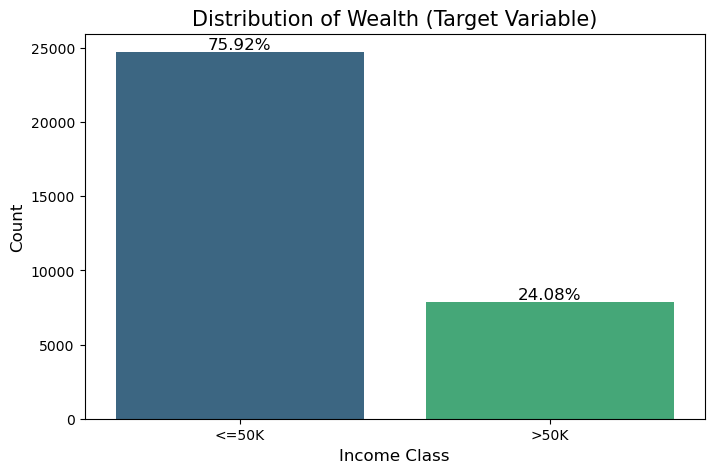

In [7]:
# Numerical variables analysis
# 1. Calculate absolute counts and percentages
target_counts = df['class'].value_counts()
target_percentages = df['class'].value_counts(normalize=True) * 100

print("--- Wealth Class Distribution (Counts) ---")
print(target_counts)
print("\n--- Wealth Class Distribution (Percentages) ---")
print(target_percentages)

# 2. Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Wealth (Target Variable)', fontsize=15)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Optional: Add percentage labels on top of the bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
            height + 200, # Position text slightly above bar
            '{:1.2f}%'.format(100 * height/total),
            ha="center", fontsize=12)

plt.show()


=== CATEGORICAL VARIABLES ===
--- Education Level Summary ---
              Count  Percentage
education                      
HS-grad       10501       32.25
Some-college   7291       22.39
Bachelors      5355       16.45
Masters        1723        5.29
Assoc-voc      1382        4.24
11th           1175        3.61
Assoc-acdm     1067        3.28
10th            933        2.87
7th-8th         646        1.98
Prof-school     576        1.77
9th             514        1.58
12th            433        1.33
Doctorate       413        1.27
5th-6th         333        1.02
1st-4th         168        0.52
Preschool        51        0.16


/tmp/ipykernel_2422995/382117936.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=edu_counts.index, palette='viridis')


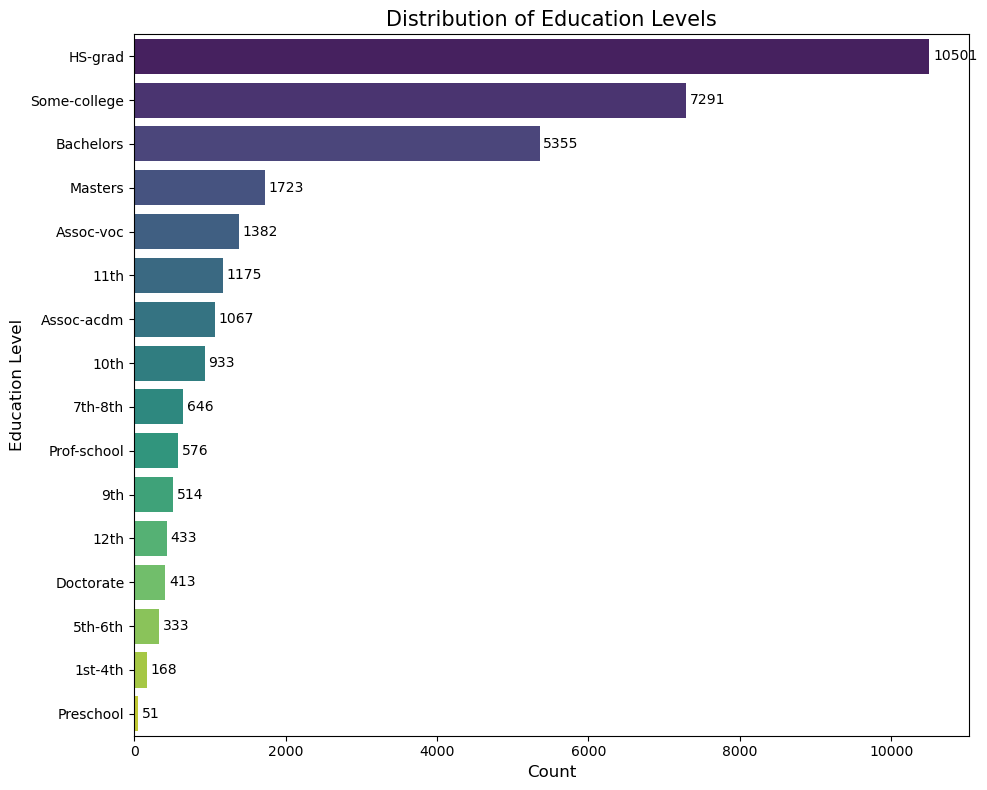

In [8]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")

edu_counts = df['education'].value_counts()
edu_percentages = df['education'].value_counts(normalize=True) * 100

edu_summary = pd.DataFrame({
    'Count': edu_counts,
    'Percentage': edu_percentages.round(2)
})

print("--- Education Level Summary ---")
print(edu_summary)

plt.figure(figsize=(10, 8))

sns.countplot(y='education', data=df, order=edu_counts.index, palette='viridis')

plt.title('Distribution of Education Levels', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

for i, v in enumerate(edu_counts):
    plt.text(v + 50, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

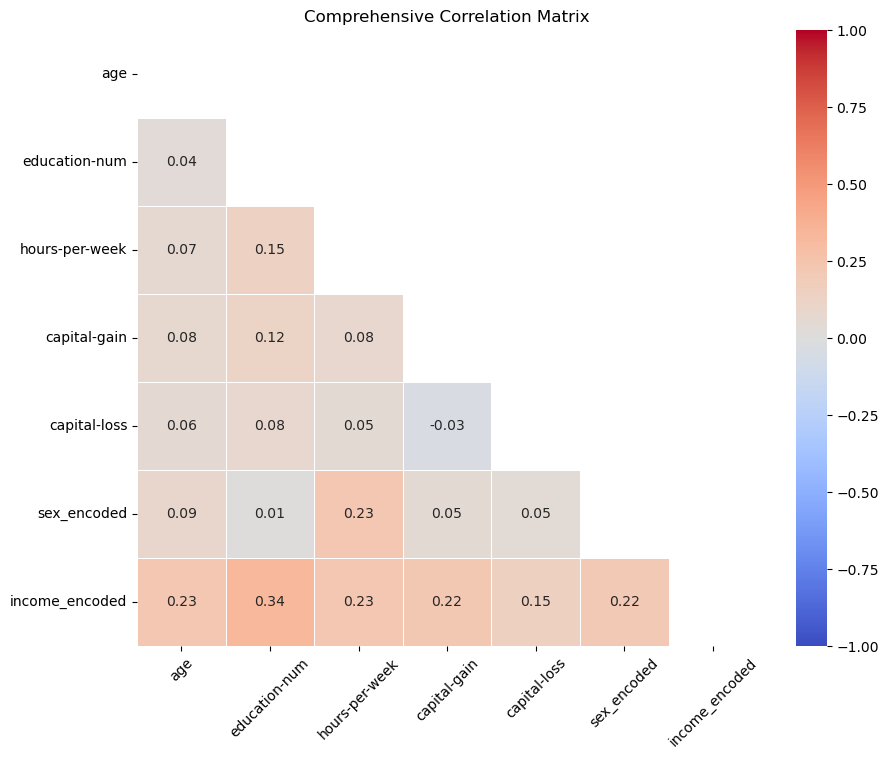

In [11]:
# Correlation analysis
# multivariate because the bi-variate analysis was useless for wealth

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['sex_encoded'] = df['sex'].apply(lambda x: 1 if 'Male' in str(x) else 0)
df['income_encoded'] = df['class'].astype(str).apply(lambda x: 1 if '>50K' in x else 0)

cols_of_interest = [
    'age', 
    'education-num', 
    'hours-per-week', 
    'capital-gain', 
    'capital-loss', 
    'sex_encoded', 
    'income_encoded'
]

corr_matrix = df[cols_of_interest].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    mask=mask, 
    vmin=-1, 
    vmax=1,
    linewidths=0.5
)

plt.title('Comprehensive Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

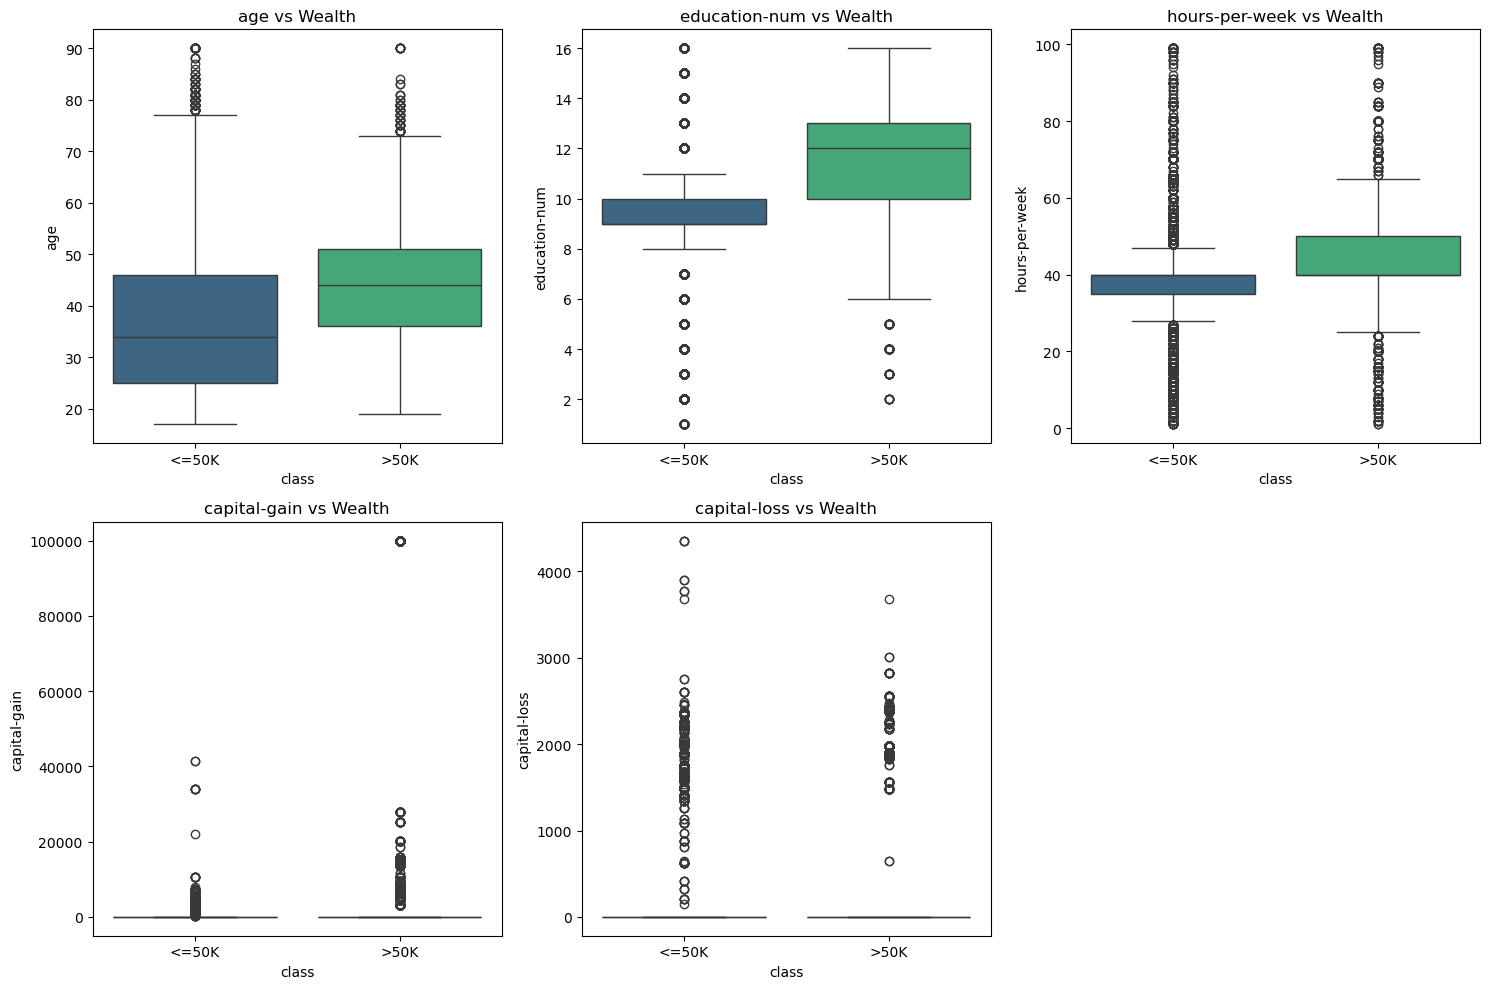

In [14]:
# Relationship between variables and target
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Wealth')

plt.tight_layout()
plt.show()


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Overtime Hypothesis
**H1:** Hours per week is directly correlated with wealth
- **Null Hypothesis (H0):** There is no difference in mean hours-per-week between individuals earning >50k and <50k
- **Alternative Hypothesis (H1):** The mean hours per week for the 50k group is greater than the <50k group.
- **Rationale:** I think the more hours you work, the more mone you will make.

### Hypothesis 2: Marriage hypothesis
**H2:** There is a correlation between marriage and class.
- **Null Hypothesis (H0):** Martial status and income class are independent variables
- **Alternative Hypothesis (H1):** Martial stauts and income class are dependent (or otherwise statistically significant)
- **Rationale:** Marriage is a great thing for money -- you share expenses and have double the stability.

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Overtime Hypothesis

**Test Choice:** T-Test
- **Why appropriate:** This test is correct because I wanted to compare the means of the dataset and how likely they are to be correlated. I wanted to be absolutely statistically certain about my hypothesis, and a T-value with P=0 is about as certain as you can get with this many rows.


In [22]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

group_low_income = df[df['class'].astype(str).str.contains('<=50K')]['hours-per-week']
group_high_income = df[df['class'].astype(str).str.contains('>50K')]['hours-per-week']

t_stat, p_value_t = stats.ttest_ind(group_high_income, group_low_income, equal_var=False)

print(f"Mean hours (<=50K): {group_low_income.mean():.2f}")
print(f"Mean hours (>50K):  {group_high_income.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4e}")

if p_value_t < 0.05:
    print("Reject H0: There is a significant difference in hours worked between income groups.")
else:
    print("Fail to reject H0: No significant difference found.")
    
print("\n" + "="*50 + "\n")


=== TESTING HYPOTHESIS 1 ===
Mean hours (<=50K): 38.84
Mean hours (>50K):  45.47
T-statistic: 45.1231
P-value: 0.0000e+00
Reject H0: There is a significant difference in hours worked between income groups.




### Testing Hypothesis 2: Marriage Hypothesis
**Test Choice:** Chi-Square Test
- **Why appropriate:** Because I am testing independence, I figure that the Chi-Square test is the most efficient because I want to know the association between qualitative and quantitative variables.


In [20]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

contingency_table = pd.crosstab(df['marital-status'], df['class'])
print("Contingency Table (Marital Status vs Wealth):")
print(contingency_table)

chi2_stat, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi:.4e}")

if p_value_chi < 0.05:
    print("Reject H0: Marital status and Class are significantly associated (dependent).")
else:
    print("Fail to reject H0: No significant association found.")


=== TESTING HYPOTHESIS 2 ===
Contingency Table (Marital Status vs Wealth):
class                  <=50K  >50K
marital-status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married          10192   491
Separated                959    66
Widowed                  908    85
Chi-Square Statistic: 6517.7417
P-value: 0.0000e+00
Reject H0: Marital status and Class are significantly associated (dependent).


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Despite larger-than-ever wealth inequality, wealth is still heavily dependent on both extraneous (marriage) and intrinsic (hours worked) factors
2. The most common education status is HS Grad, followed by some college and then bachelors. Additionally, education and marital status are closely correlated.
3. It's interesting to note that age and education_num are weakly correlated, and sex is still positively correlated with income.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | T-Test | 0.0000 | Significant Correlation | Hours worked is heavily correlated with wealth |
| **H2** | Chi-Squared | 0.0000 | Significant Correlation | Marriage is certainly not independent from wealth |

### Key Insights:
- Despite larger-than-ever wealth inequality, wealth is dependent on many factors.
- Wealth is heavily dependent on both extraneous (marriage) and intrinsic (hours worked) factors
- This dataset is pre-2025 recession and pre-AI bubble, so there is likely even more wealth inequality missed.

### Future Research:
- Exact wealth, or correlation with net worth may be worth investigating. It could also be worth looking towards country-specific micro analyses to understand exactly the scope of study.
- Disability status could be a large impact, especially in the non-working group.

---


In [26]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: adult.data")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]} (excluding target)")
print(f"\nAnalysis completed successfully!")


=== ANALYSIS COMPLETE ===
Dataset analyzed: adult.data
Sample size: 32561 observations
Number of features: 17 (excluding target)

Analysis completed successfully!
